In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import keras.backend as K

In [5]:
# (60000, 1, 28, 28)
# (60000, 28, 28, 1)
img_size = X_train.shape[1]
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_size, img_size)
    X_test = X_test.reshape(X_test.shape[0], 1, img_size, img_size)
else:
    X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
    X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_train = X_train / 255

In [8]:
X_test = X_test / 255

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[0]

5

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
y_train.shape

(60000, 10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
#
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 15s 12ms/step - loss: 0.4360 - accuracy: 0.8645 - val_loss: 0.0841 - val_accuracy: 0.9750
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1489 - accuracy: 0.9557 - val_loss: 0.0564 - val_accuracy: 0.9842
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1126 - accuracy: 0.9669 - val_loss: 0.0462 - val_accuracy: 0.9863
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0923 - accuracy: 0.9732 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0776 - accuracy: 0.9761 - val_loss: 0.0384 - val_accuracy: 0.9891
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0724 - accuracy: 0.9785 - val_loss: 0.0417 - val_accuracy: 0.9883
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.0365 - val_accuracy: 0.989

In [20]:
from matplotlib import pyplot as plt

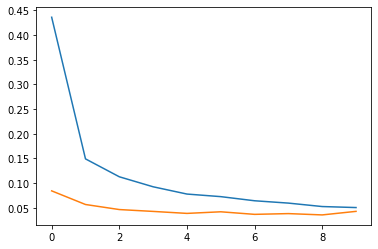

In [21]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

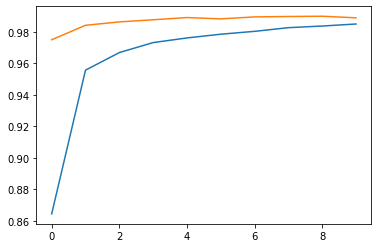

In [22]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0326 - accuracy: 0.9894


[0.032551269978284836, 0.9894000291824341]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [25]:
y_test.shape

(10000, 10)

In [26]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

confusion_matrix(y_true, y_pred)

array([[ 977,    1,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   3,    1, 1023,    0,    0,    0,    0,    5,    0,    0],
       [   0,    0,    1, 1001,    0,    4,    0,    2,    2,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   2,    1,    0,    3,    0,  883,    1,    1,    0,    1],
       [   7,    3,    0,    0,    1,    5,  941,    0,    1,    0],
       [   0,    2,    2,    0,    0,    0,    0, 1020,    1,    3],
       [   8,    1,    4,    1,    3,    1,    1,    4,  946,    5],
       [   0,    2,    0,    0,    8,    3,    0,    8,    0,  988]])

In [27]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

